# Iris Dataset Analysis

In this analysis, we'll explore the Iris dataset using various machine learning methods to classify the Iris flower species.

## Introduction

The Iris dataset is a classic dataset in machine learning, containing measurements of iris flowers from three different species: Setosa, Versicolor, and Virginica. We'll perform the following analyses:

1. **K-Nearest Neighbors (KNN) Classifier**
2. **Naive Bayes Classifier**
3. **Mahalanobis Distance Classifier**

## Importing Necessary Libraries
We start by importing the required libraries for data manipulation, visualization, and machine learning algorithms.

In [109]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import Counter 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
from scipy.stats import norm 

In [110]:
dataset = pd.read_csv('iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


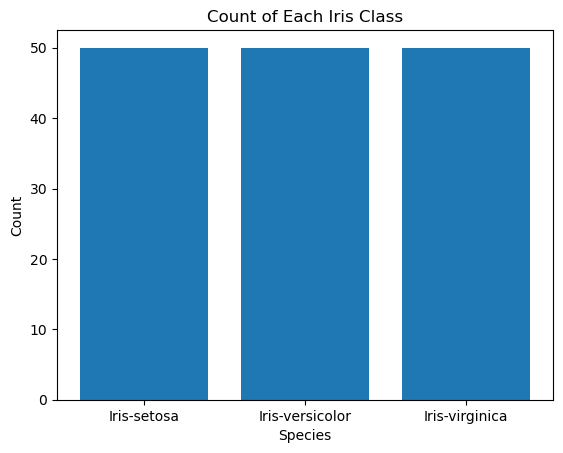

In [111]:
class_counts = dataset['Species'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Each Iris Class')
plt.show()

In [112]:
target_column = 'Species'

X = dataset.drop(target_column, axis=1).values  
y_str = dataset[target_column].values  

label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_num = np.array([label_map[label] for label in y_str])

Irisdata = np.column_stack((X, y_num))
dataset['Species'] = y_nums

# Q1a


In [113]:
def calculate_covariance_matrix(data):
 

    data_T = np.transpose(data)
   

    means = np.mean(data_T, axis=1, keepdims=True)
   

    centered_data = data_T - means
   

    covariance_matrix = np.dot(centered_data, centered_data.T) / (data_T.shape[1] - 1)
   
    return covariance_matrix

# Q1b

In [114]:
def train_test_split(df, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
        
    indices = np.arange(len(df))
    np.random.shuffle(indices)
    test_size = int(len(df) * test_size)
    
    train_indices = indices[test_size:]
    test_indices = indices[:test_size]
    
    train_set = df.iloc[train_indices]
    test_set = df.iloc[test_indices]
    
    X_train = train_set.drop('Species', axis=1).values  
    y_train_str = train_set['Species'].values
    y_test_str = test_set['Species'].values
    
    label_encoder = LabelEncoder()
    y_train_num = label_encoder.fit_transform(y_train_str)
    y_test_num = label_encoder.transform(y_test_str)
    
    return X_train, test_set.drop('Species', axis=1).values, y_train_num, y_test_num

# Q1c

In [180]:
def calculate_confusion_matrix(y_true, y_pred, num_classes):
    confusion_matrix = np.zeros((num_classes, num_classes))

    for true_label, pred_label in zip(y_true, y_pred):
        confusion_matrix[true_label, pred_label] += 1

    return confusion_matrix

In [162]:
def calculate_mean_covariance(X):

    classes = np.unique(X[:, -1])

    class_means = []
    class_covariances = []

    for c in classes:

        class_data = X[X[:, -1] == c][:, :-1]  

        mean_vector = np.mean(class_data, axis=0)

        covariance_matrix = calculate_covariance_matrix(class_data)

        class_means.append(mean_vector)
        class_covariances.append(covariance_matrix)

    return class_means, class_covariances

In [163]:
X = Irisdata[:,1 :-1]
y = Irisdata[:,-1]
X_train, X_test, y_train, y_test = train_test_split(dataset, random_state =42)

In [164]:
cov_matrix = calculate_covariance_matrix(X)

print("Covariance Matrix Shape:", cov_matrix.shape)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix Shape: (4, 4)
Covariance Matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


# Q1d

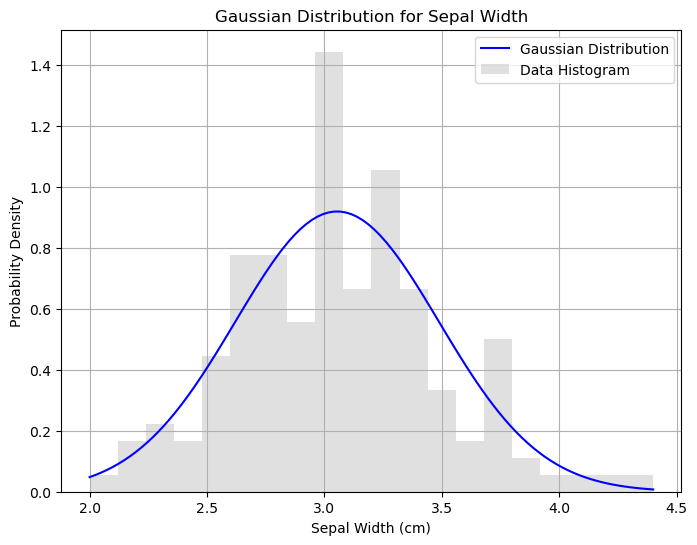

In [165]:
feature = 'SepalWidthCm'  # Assuming 'SepalWidthCm' is the column name for Sepal Width in your dataset

# Extract data for the selected feature
data = dataset[feature]

# Calculate mean and standard deviation for the feature
mean = data.mean()
std = data.std()

# Generate data points along the feature range
x = np.linspace(data.min(), data.max(), 100)
y = norm.pdf(x, mean, std)  # Calculate the PDF using norm function

# Plot the Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', label='Gaussian Distribution')
plt.hist(data, bins=20, density=True, color='lightgray', alpha=0.7, label='Data Histogram')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution for Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

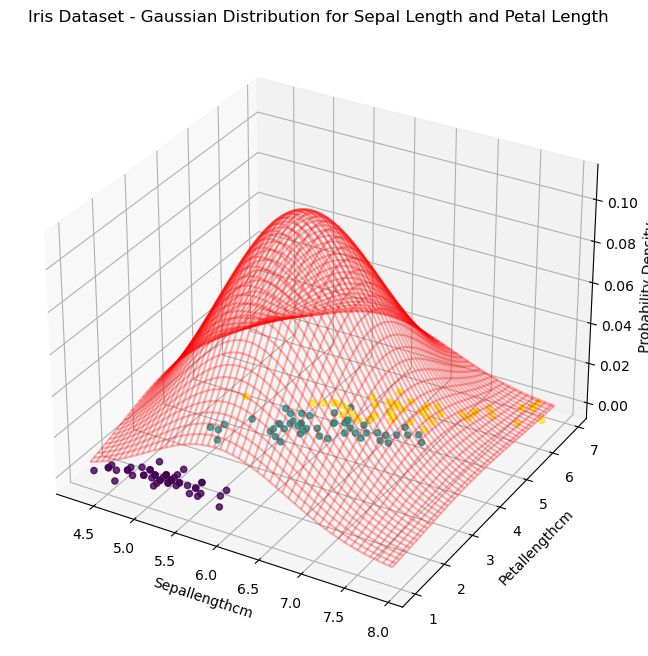

In [166]:
# Select two features for visualization

feature1 = 'SepalLengthCm'
feature2 = 'PetalLengthCm'

# Calculate means and standard deviations for features
mean1 = dataset[feature1].mean()
mean2 = dataset[feature2].mean()
std1 = dataset[feature1].std()
std2 = dataset[feature2].std()

# Create a mesh grid for the Gaussian distribution
x1 = np.linspace(dataset[feature1].min(), dataset[feature1].max(), 100)
x2 = np.linspace(dataset[feature2].min(), dataset[feature2].max(), 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros(X1.shape)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i, j] = norm.pdf(X1[i, j], mean1, std1) * norm.pdf(X2[i, j], mean2, std2)

# Create the 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset[feature1], dataset[feature2], c=dataset['Species'], cmap='viridis', alpha=0.8)

# Overlay the Gaussian distribution as a wireframe
ax.plot_wireframe(X1, X2, Z, color='r', alpha=0.3)

# Set labels and title
ax.set_xlabel(feature1.capitalize())
ax.set_ylabel(feature2.capitalize())
ax.set_zlabel('Probability Density')
ax.set_title('Iris Dataset - Gaussian Distribution for Sepal Length and Petal Length')

plt.show()

# Q2a

In [167]:
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    

In [168]:
knn = KNNClassifier(k=5)
knn.fit(X_train, y_train)

In [169]:
y_pred1 = knn.predict(X_test)

In [176]:
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)




Accuracy: 1.0


In [181]:
conf_matrix = calculate_confusion_matrix(y_test, y_pred1, num_classes=3)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10.  0.  0.]
 [ 0.  9.  0.]
 [ 0.  0. 11.]]


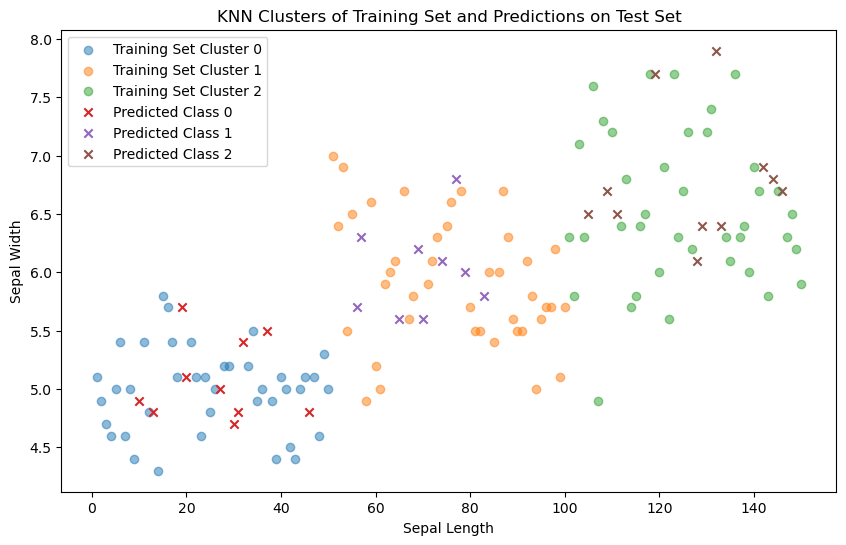

In [153]:

plt.figure(figsize=(10, 6))


for i in range(3):  
    X_class = X_train[y_train == i]
    plt.scatter(X_class[:, 0], X_class[:, 1], label=f'Training Set Cluster {i}', alpha=0.5)


for i in range(3): 
    X_class = X_test[y_pred1 == i]
    plt.scatter(X_class[:, 0], X_class[:, 1], label=f'Predicted Class {i}', marker='x')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN Clusters of Training Set and Predictions on Test Set')
plt.legend()
plt.show()

# Q2b


In [ ]:
Trainset = np.column_stack((X_train, y_train))
mean, covariance = calculate_mean_covariance(Trainset)

In [155]:
def predict_class(testset, mean, covariance):
    d = len(mean[0])
    t = (2*math.pi)**(d/2)
    problist = []
    for i in range(len(mean)):
        detC = np.sqrt(np.linalg.det(covariance[i]))
        p = np.dot(np.dot((testset - mean[i]), np.linalg.inv(covariance[i]) ), (testset - mean[i]).T )
        k = math.e**(-0.5*p)
        prob = k / (t * detC)
        problist.append(prob)
    return problist.index(max(problist))

In [156]:
def predict(X_test, class_means, class_covariances):
    predictions = []
    for test_point in X_test:
        predicted_class = predict_class(test_point, class_means, class_covariances)
        predictions.append(predicted_class)
    return predictions


In [157]:
y_true = y_test
y_pred = predict(X_test, mean, covariance)
num_classes = len(np.unique(y_true))


In [158]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [182]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


conf_matrix = calculate_confusion_matrix(y_test, y_pred, num_classes=3)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[10.  0.  0.]
 [ 0.  9.  0.]
 [ 0.  0. 11.]]


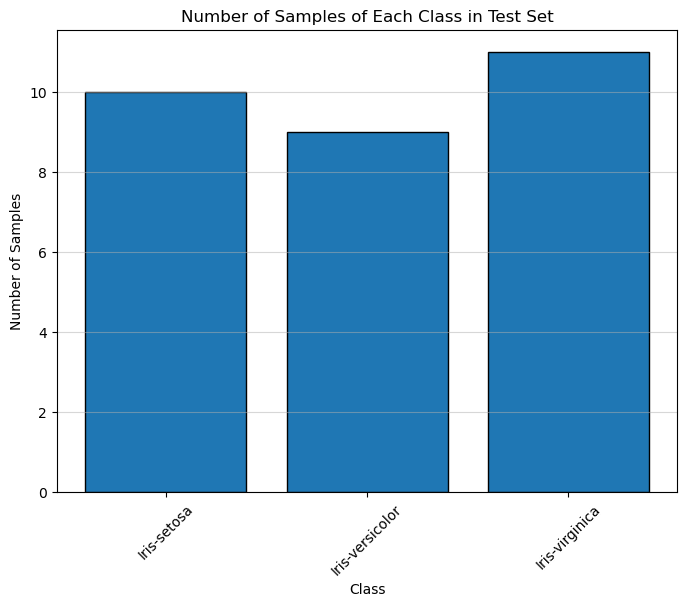

In [183]:
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=np.arange(len(label_encoder.classes_) + 1) - 0.5, rwidth=0.8, edgecolor='black')
plt.xticks(range(len(label_encoder.classes_)), label_encoder.classes_, rotation=45)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Number of Samples of Each Class in Test Set')
plt.grid(axis='y', alpha=0.5)
plt.show()

# Q2c


In [203]:
class MahalanobisDistanceClassifier:
    def __init__(self):
        self.cov_inv = None

    def fit(self, X_train):
        self.cov_inv = np.linalg.inv(calculate_covariance_matrix(X_train))

    def mahalanobis_distance(self, x, mean):
        mean_diff = x - mean
        mahalanobis_dist = np.sqrt(np.dot(np.dot(mean_diff, self.cov_inv), mean_diff.T))
        return mahalanobis_dist

    def predict(self, X_test, class_means):
        y_pred = [self._predict(x, class_means) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x, class_means):
        distances = [self.mahalanobis_distance(x, mean) for mean in class_means]
        return np.argmin(distances)


In [205]:
def calculate_class_means(X_train, y_train):
    classes = np.unique(y_train)
    class_means = []
    for c in classes:
        class_data = X_train[y_train == c]
        class_mean = np.mean(class_data, axis=0)
        class_means.append(class_mean)
    return class_means

In [206]:
class_means = calculate_class_means(X_train, y_train)

In [207]:
mahalanobis_classifier = MahalanobisDistanceClassifier()
mahalanobis_classifier.fit(X_train)

In [208]:
y_pred_mahalanobis = mahalanobis_classifier.predict(X_test, class_means)

In [213]:
accuracy_mahalanobis = accuracy_score(y_test, y_pred_mahalanobis)

In [214]:
conf_matrix_mahalanobis = calculate_confusion_matrix(y_test, y_pred_mahalanobis, num_classes=3)

In [215]:
print("\nMahalanobis Distance Classifier Accuracy:", accuracy_mahalanobis)
conf_matrix_mahalanobis


Mahalanobis Distance Classifier Accuracy: 0.9333333333333333


array([[10.,  0.,  0.],
       [ 0.,  9.,  0.],
       [ 0.,  2.,  9.]])